<a href="https://colab.research.google.com/github/eren-darici/ECON6190/blob/main/Project_PartB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part B
Use a real-world cross-section data set with a continuous dependent variable (Y), and at least
4 independent variables, with at least one being continuous (X1, X2, ..) . Consider the sample
size to be 120 or more.

In [21]:
# Install dependencies
install.packages("dplyr") # Data manipulation
library(dplyr)

install.packages("stargazer") # Regression table
library(stargazer)

install.packages("ggplot2") # Data vis
library(ggplot2)

install.packages("lmtest") # BP test
library(lmtest)

install.packages("performance") # Multicollinearity
library(performance)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bayestestR’, ‘insight’, ‘datawizard’




In [22]:
# Read data
DATA_URL <- "https://raw.githubusercontent.com/eren-darici/ECON6190/refs/heads/main/data/medical_insurance.csv"
data <- read.csv(DATA_URL)
head(data, 5)


,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,⋯,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,75722,52,Female,North,Suburban,22700,Doctorate,Married,Retired,3,⋯,0,1,0,1,0,2,0,1,0,0
2,80185,79,Female,North,Urban,12800,No HS,Married,Employed,3,⋯,0,1,1,0,0,1,0,1,1,0
3,19865,68,Male,North,Rural,40700,HS,Married,Retired,5,⋯,0,0,1,1,0,2,1,0,1,0
4,76700,15,Male,North,Suburban,15600,Some College,Married,Self-employed,5,⋯,0,0,0,1,0,0,1,0,0,0
5,92992,53,Male,Central,Suburban,89600,Doctorate,Married,Self-employed,2,⋯,0,1,0,2,0,1,1,0,1,0


In [23]:
# Check missing values
any(is.na(data))

[1] FALSE

In [24]:
# Select Y (dependent variable)
y <- data$annual_medical_cost

# Select X (6 independent variables)
X <- data[, c("age",
            "bmi",
            "chronic_count",
            "visits_last_year",
            "medication_count",
              "hospitalizations_last_3yrs")]

In [25]:
# Assertion to check missing
stopifnot(nrow(X) == length(y))

In [26]:
# Combine data
model_data <- data.frame(X, y = y)

# Part B.i.
Provide descriptive statistics for all variables including their variances. Run OLS
regression of Y on all X variables and report the results in a Table. Comment on
statistical significance of regression coefficients at 10%, 5% and 1% levels? How is
the overall in-sample fit of the model? Justify.

In [27]:
# Descriptive statistics
describe_func <- function(x) {
  c(
    mean = mean(x, na.rm = TRUE),
    sd = sd(x, na.rm = TRUE),
    variance = var(x, na.rm = TRUE),
    min = min(x, na.rm = TRUE),
    q25 = quantile(x, 0.25, na.rm = TRUE),
    median = median(x, na.rm = TRUE),
    q75 = quantile(x, 0.75, na.rm = TRUE),
    max = max(x, na.rm = TRUE)
  )
}

# Appply function to model data
descriptive_stats <- sapply(model_data, describe_func)
descriptive_stats

,age,bmi,chronic_count,visits_last_year,medication_count,hospitalizations_last_3yrs,y
mean,47.52150,26.990512,0.7247200,1.927650,1.236320,0.09364000,3009.452
sd,15.98875,4.994883,0.8055231,1.737730,1.209358,0.30484829,3127.463
variance,255.64019,24.948851,0.6488674,3.019706,1.462547,0.09293248,9781023.705
min,0.00000,12.000000,0.0000000,0.000000,0.000000,0.00000000,55.550
q25.25%,37.00000,23.600000,0.0000000,1.000000,0.000000,0.00000000,1175.117
median,48.00000,27.000000,1.0000000,2.000000,1.000000,0.00000000,2082.575
q75.75%,58.00000,30.400000,1.0000000,3.000000,2.000000,0.00000000,3707.957
max,100.00000,50.400000,6.0000000,25.000000,11.000000,3.00000000,65724.900


In [28]:
# Run OLS
model <- lm(y ~ ., data=model_data)
summary(model)


Call:
lm(formula = y ~ ., data = model_data)

Residuals:
   Min     1Q Median     3Q    Max 
 -8646  -1497   -656    668  60387 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 329.0744    58.3380   5.641  1.7e-08 ***
age                          18.1921     0.5793  31.404  < 2e-16 ***
bmi                          26.5993     1.8371  14.479  < 2e-16 ***
chronic_count               934.8406    13.9062  67.224  < 2e-16 ***
visits_last_year            129.9879     5.9797  21.738  < 2e-16 ***
medication_count            -12.1458     8.2618  -1.470    0.142    
hospitalizations_last_3yrs 1974.3693    30.1506  65.484  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2902 on 99993 degrees of freedom
Multiple R-squared:  0.1392,	Adjusted R-squared:  0.1392 
F-statistic:  2696 on 6 and 99993 DF,  p-value: < 2.2e-16


In [29]:
# Stargazer for better table
stargazer(model, type = "text", title = "OLS Regression Results")


OLS Regression Results
                               Dependent variable:     
                           ----------------------------
                                        y              
-------------------------------------------------------
age                                 18.192***          
                                     (0.579)           
                                                       
bmi                                 26.599***          
                                     (1.837)           
                                                       
chronic_count                       934.841***         
                                     (13.906)          
                                                       
visits_last_year                    129.988***         
                                     (5.980)           
                                                       
medication_count                     -12.146           
                        

# Part B.ii.
Generate in-sample predictions and compare it to observed Y. [You may use kernel
density plots for a quick comparison. Provide a brief comment].

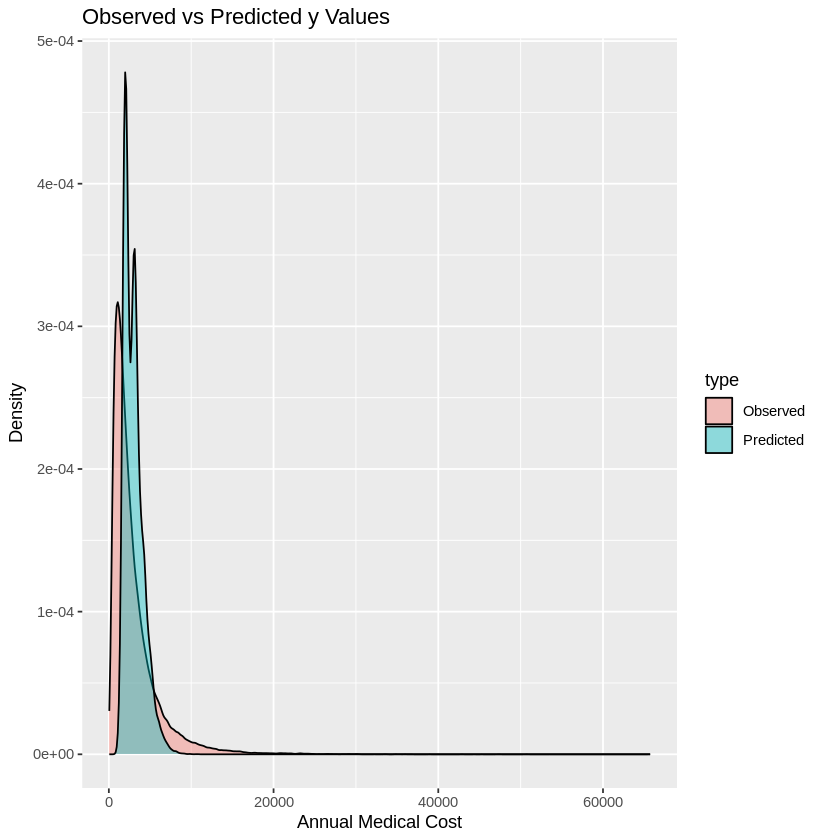

In [30]:
# Generate in sample predictions
pred <- predict(model)

# Bind data
data_kde <- data.frame(
  value = c(y, pred),
  type = rep(c("Observed", "Predicted"), c(length(y), length(pred)))
)

# Plot KDE
ggplot(data_kde, aes(x=value, fill=type)) +
  geom_density(alpha=0.4) +
  labs(
    title="Observed vs Predicted y Values",
    x = "Annual Medical Cost",
    y = "Density"
  )

# Part B.iii.
Run a heteroscedasticity test and report your result with conclusion

In [31]:
# Run BP Test
bp_test <- bptest(model)
bp_test


	studentized Breusch-Pagan test

data:  model
BP = 1997, df = 6, p-value < 2.2e-16


# Part B.iv.
Run a multicollinearity test and report your result with conclusion.

In [35]:
# Test VIF (Variance Inflation Factor)
vif_values <- check_collinearity(model)
vif_values

Term,VIF,VIF_CI_low,VIF_CI_high,SE_factor,Tolerance,Tolerance_CI_low,Tolerance_CI_high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
age,1.018899,1.013448,1.026561,1.009405,0.9814512,0.9741264,0.9867305
bmi,1.000028,1.000000,Inf,1.000014,0.9999716,0.0000000,1.0000000
chronic_count,1.490299,1.478177,1.502729,1.220778,0.6710062,0.6654562,0.6765090
visits_last_year,1.282381,1.272848,1.292247,1.132423,0.7797993,0.7738458,0.7856395
medication_count,1.185659,1.177352,1.194355,1.088880,0.8434126,0.8372717,0.8493634
hospitalizations_last_3yrs,1.003357,1.000524,1.021530,1.001677,0.9966538,0.9789239,0.9994767


# Part B.v.
Drop any 2 independent variables of your choice and run an F-test to explain whether
you should prefer the restricted (0-type restriction as explained in class) or the
unrestricted model. Make sure to report your F-test results

In [36]:
# Drop visits_last_year, medication_count
restricted_model_data <- model_data %>%
  select(-visits_last_year, -medication_count)

restricted_model_data

age,bmi,chronic_count,hospitalizations_last_3yrs,y
<int>,<dbl>,<int>,<int>,<dbl>
52,27.4,1,0,6938.06
79,26.6,2,0,1632.61
68,31.5,3,0,7661.01
15,31.6,1,0,5130.27
53,30.5,2,0,1700.73
63,20.4,1,0,2697.34
36,21.6,0,0,1746.68
21,30.7,1,0,1564.03
53,27.8,1,0,5684.12


In [38]:
# Run OLS on restricted model
restricted_model <- lm(y ~ ., data=restricted_model_data)
stargazer(restricted_model, type = "text", title = "Restricted Model OLS Regression Results")


Restricted Model OLS Regression Results
                               Dependent variable:     
                           ----------------------------
                                        y              
-------------------------------------------------------
age                                 18.176***          
                                     (0.581)           
                                                       
bmi                                 26.671***          
                                     (1.841)           
                                                       
chronic_count                      1,059.245***        
                                     (11.545)          
                                                       
hospitalizations_last_3yrs         1,974.796***        
                                     (30.222)          
                                                       
Constant                            473.268***         
       

In [50]:
# F-Test
f_test <- anova(restricted_model, model)
stargazer(as.data.frame(f_test), type = "text", digits = 6)


Statistic N          Mean                St. Dev.                Min                    Max          
-----------------------------------------------------------------------------------------------------
Res.Df    2     99,994.000000            1.414214               99,993                 99,995        
RSS       2 843,912,568,573.000000 2,826,300,097.000000 841,914,072,609.000000 845,911,064,537.000000
Df        1        2.000000                                       2                      2           
Sum of Sq 1  3,996,991,928.000000                        3,996,991,928.000000   3,996,991,928.000000 
F         1       237.358700                                  237.358700             237.358700      
Pr(> F)   1        0.000000                                       0                      0           
-----------------------------------------------------------------------------------------------------
